In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from pandas.plotting import autocorrelation_plot

In [2]:
# Load the dataset
data = pd.read_csv('ibm.csv')
prices = data['Close'].values  # Use the 'Close' column for stock prices


In [3]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices.reshape(-1, 1))

In [4]:
# Preparing the dataset for LSTM
sequence_length = 20
x, y = [], []
for i in range(len(prices_scaled) - sequence_length - 1):
    x.append(prices_scaled[i:i+sequence_length])
    y.append(prices_scaled[i+sequence_length])
x = np.array(x)
y = np.array(y)



In [5]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [6]:

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(64, return_sequences=True),
    LSTM(64),
    Dropout(0.3),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')


C:\Users\srini\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# Training the model
history=model.fit(x_train, y_train, epochs=150, batch_size=16, validation_data=(x_test, y_test))




Epoch 1/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 15s 74ms/step - loss: 0.0242 - val_loss: 0.0052
Epoch 2/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0074 - val_loss: 0.0044
Epoch 3/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0064 - val_loss: 0.0034
Epoch 4/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0048 - val_loss: 0.0032
Epoch 5/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0056 - val_loss: 0.0030
Epoch 6/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0053 - val_loss: 0.0028
Epoch 7/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0042 - val_loss: 0.0024
Epoch 8/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0042 - val_loss: 0.0022
Epoch 9/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0037 - val_loss: 0.0024
Epoch 10/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0038 - val_loss: 0.0025
Epoch 11/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0036 - val_loss: 0.0018
Epoch 12/150
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/ste

In [8]:
# Evaluate the model
train_loss = model.evaluate(x_train, y_train, verbose=0)
test_loss = model.evaluate(x_test, y_test, verbose=0)

In [9]:
# Predict future values
predicted = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 318ms/step


In [10]:
# Inverse transform to get actual values
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


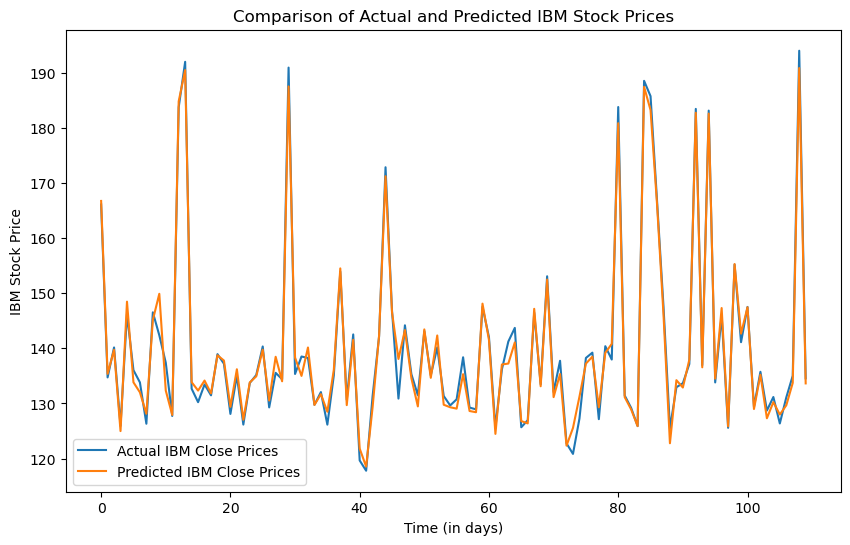

In [11]:
# Visualization: Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.plot(real_prices, label='Actual IBM Close Prices')
plt.plot(predicted_prices, label='Predicted IBM Close Prices')
plt.title('Comparison of Actual and Predicted IBM Stock Prices')
plt.xlabel('Time (in days)')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()

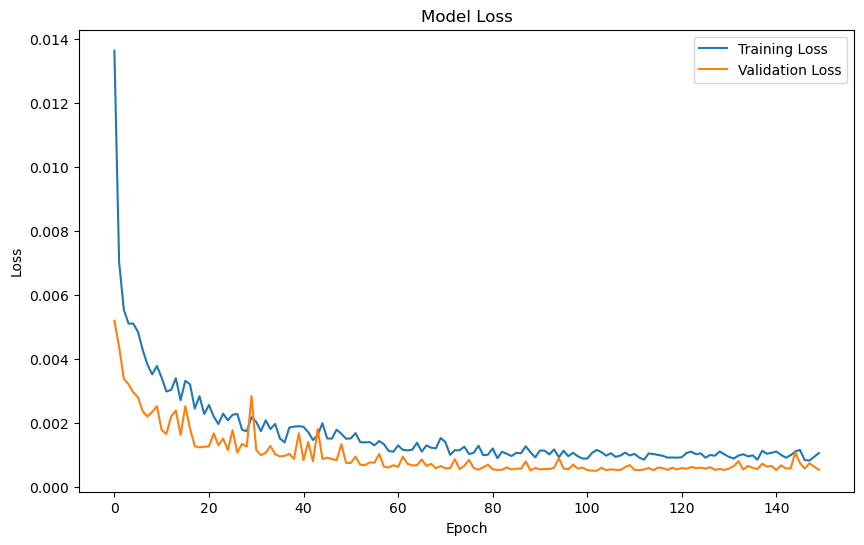

In [12]:
# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

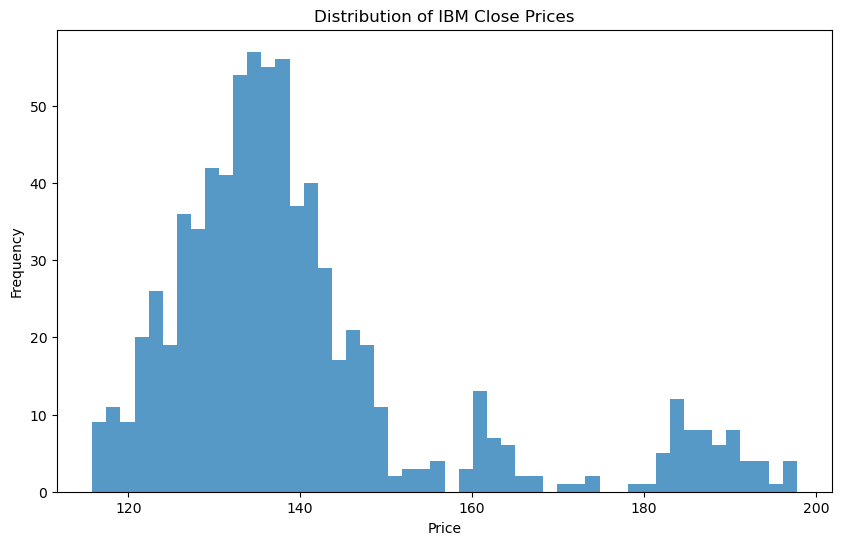

In [13]:
# Distribution of Close Prices
plt.figure(figsize=(10, 6))
plt.hist(data['Close'], bins=50, alpha=0.75)
plt.title('Distribution of IBM Close Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

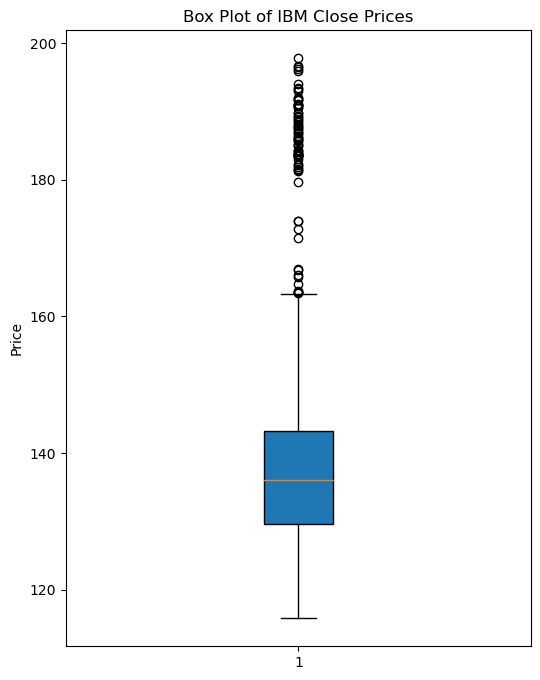

In [14]:
# Visualization 4: Box Plot of Close Prices
plt.figure(figsize=(6, 8))
plt.boxplot(data['Close'], vert=True, patch_artist=True)
plt.title('Box Plot of IBM Close Prices')
plt.ylabel('Price')
plt.show()

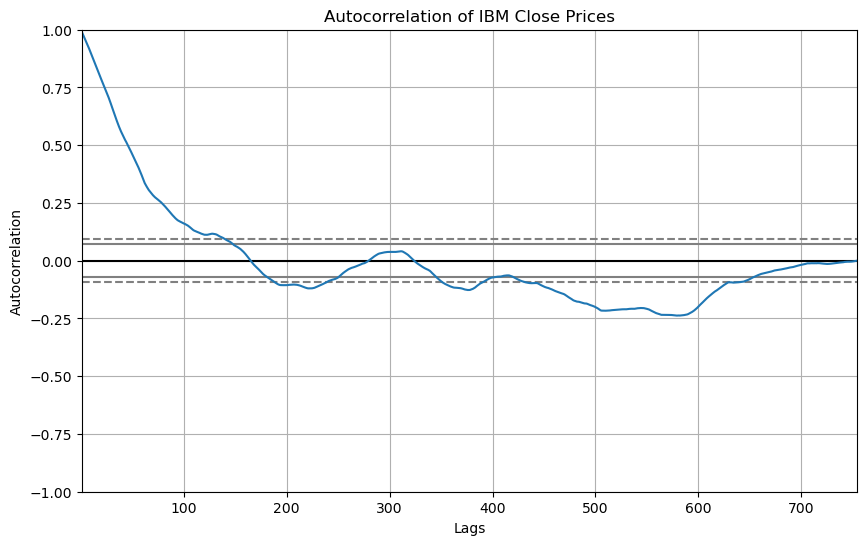

In [15]:
plt.figure(figsize=(10, 6))
autocorrelation_plot(data['Close'])
plt.title('Autocorrelation of IBM Close Prices')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()